# Prova Projeto Intermediário

## 1. Choose a labeled text dataset used for classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importar regressao logistica]
from sklearn.linear_model import LogisticRegression
# importar funcao para separar dados em treino e teste
from sklearn.model_selection import train_test_split
import pickle

In [2]:
import scipy.stats as stats
sample = stats.bernoulli.rvs(0.8, size=100)
prob_pos = sum(sample) / len(sample)
print(prob_pos)

0.79


In [3]:
df = pd.read_csv('../data/combined_data_final.csv') # 1 -> spam; 0 -> not spam

In [4]:
df.head(10)

label                                               text
0     1  ounce feather bowl hummingbird opec moment ala...
1     1  wulvob get your medircations online qnb ikud v...
2     0   computer connection from cnn com wednesday es...
3     1  university degree obtain a prosperous future m...
4     0  thanks for all your answers guys i know i shou...
5     0  larry king live at escapenumber escapenumber p...
6     0  michael pobega wrote i'm not sure if it's the ...
7     0  hi i have this error tr sample escapenumber es...
8     1  works gateway world art explore tattooing full...
9     1  upon this account he is not only very cautious...

In [5]:
df.size

188382

## 2. Define a classification pipeline

Include pre-processing steps and feature engineering, possibly using stemming, lemmatization, removal of particular words, and/or text augmentation with wordnet. In this step, briefly review the models and assumptions. In special, for the bag-of-words model, discuss why it makes sense to use the presence of particular words for that specific classification problem, and try to find counter-examples in which this assumption could be purposefully exploited to confuse the classifier.

In [6]:
df['label'].value_counts()

label
1       44657
0       44363
ham      3672
spam     1499
Name: count, dtype: int64

In [7]:
df['label'] = df['label'].replace({'ham': 0, 'spam': 1})


In [8]:
# float para int:
df['label'] = df['label'].astype(int)

In [9]:
df['label'].value_counts()

label
0    48035
1    46156
Name: count, dtype: int64

In [10]:
# Removing null or empty strings from data
df = df[df['text'].notnull()]

df.size

188382

In [11]:
# Função para limpar texto, mantendo letras, números, símbolos de moeda e porcentagem, exclamações e interrogações
def preprocess_text_advanced(text):
    # Definir caracteres a manter (além de letras e números)
    # R$/$ --> muito usado em spam para comunicar preços
    # % --> muito usado em spam para comunicar descontos
    # !? --> muito usado em spam para chamar atenção
    symbols_to_keep = set('r$%!?')
    
    # Manter letras, números e símbolos definidos; converter para minúsculas
    text = ''.join([char.lower() if char.isalnum() or char in symbols_to_keep or char == ' ' else '' for char in text])
    
    return text

# Aplicar o pré-processamento no DataFrame
df['processed_text'] = df['text'].apply(preprocess_text_advanced)

In [12]:
df.head(20)

label                                               text  \
0       1  ounce feather bowl hummingbird opec moment ala...   
1       1  wulvob get your medircations online qnb ikud v...   
2       0   computer connection from cnn com wednesday es...   
3       1  university degree obtain a prosperous future m...   
4       0  thanks for all your answers guys i know i shou...   
5       0  larry king live at escapenumber escapenumber p...   
6       0  michael pobega wrote i'm not sure if it's the ...   
7       0  hi i have this error tr sample escapenumber es...   
8       1  works gateway world art explore tattooing full...   
9       1  upon this account he is not only very cautious...   
10      1  my dear fellow do you feel insecure about your...   
11      1  dear valued member its your therapists assis...   
12      1  oem software means no dvd cd no packing case n...   
13      1  hello , welcome to pharmo attached nline sho l...   
14      1  elaborados con las mejores materias primas des...   
15      1  cnnmoney the opportunity for functional bevera...   
16      0  trinidadian police tell the associated press t...   
17      1  microsoft software at superb prices : but how ...   
18      1  viii russia the great northern expeditionwrith...   
19      0  author idra date escapenumber escapenumber esc...   

                                       processed_text  
0   ounce feather bowl hummingbird opec moment ala...  
1   wulvob get your medircations online qnb ikud v...  
2    computer connection from cnn com wednesday es...  
3   university degree obtain a prosperous future m...  
4   thanks for all your answers guys i know i shou...  
5   larry king live at escapenumber escapenumber p...  
6   michael pobega wrote im not sure if its the mp...  
7   hi i have this error tr sample escapenumber es...  
8   works gateway world art explore tattooing full...  
9   upon this account he is not only very cautious...  
10  my dear fellow do you feel insecure about your...  
11  dear valued member its your therapists assista...  
12  oem software means no dvd cd no packing case n...  
13  hello  welcome to pharmo attached nline sho lo...  
14  elaborados con las mejores materias primas des...  
15  cnnmoney the opportunity for functional bevera...  
16  trinidadian police tell the associated press t...  
17  microsoft software at superb prices  but how ?...  
18  viii russia the great northern expeditionwrith...  
19  author idra date escapenumber escapenumber esc...

## 3. Run and evaluate the classifier

In [13]:
# Dividir os dados em treino e teste com diferentes proporções e aleatoriedade
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label'], test_size=0.2, random_state=42)

# Verificar o tamanho dos conjuntos de treino e teste
print("XY_train.size", X_train.size)
print("XY_test.size", X_test.size)

# Verificar a proporção de spam em cada conjunto
print("y_train.mean", y_train.mean())
print("y_test.mean", y_test.mean())



XY_train.size 75352
XY_test.size 18839
y_train.mean 0.49017942456736385
y_test.mean 0.48941026593768244


In [14]:
# Importar o vetorizador de texto
from sklearn.feature_extraction.text import CountVectorizer

# Inicializar o vetorizador
vectorizer = CountVectorizer()

# Ajustar o vetorizador e transformar os dados de treino
X_train_vectorized = vectorizer.fit_transform(X_train)

# Verificar o tamanho do vocabulário
print(len(vectorizer.vocabulary_))
# Verificar o vocabulário
print(vectorizer.vocabulary_)






401748
{'alhuda': 34522, 'cibe': 80846, 'icmap': 176065, 'lahore': 203124, 'jointly': 194074, 'organized': 255607, 'seminar': 309573, 'on': 252020, 'takaful': 334160, 'at': 49126, 'pakistan': 260514, 'have': 165399, 'complete': 87531, 'range': 286801, 'of': 248571, 'insurance': 184337, 'facilities': 137989, 'accordance': 26755, 'with': 378655, 'shariah': 312598, 'principles': 276953, 'capt': 73600, 'jamil': 191197, 'akhtar': 33684, 'ceo': 76892, 'we': 373342, 'appreciate': 44035, 'the': 339778, 'effort': 120232, 'for': 145834, 'promoting': 279389, 'islamic': 188383, 'banking': 54242, 'mirza': 228110, 'munawer': 234342, 'member': 224028, 'national': 237125, 'council': 93633, 'click': 82566, 'here': 167821, 'details': 106539, 'international': 185135, 'news': 240293, 'third': 344220, 'wealth': 373382, 'management': 217925, 'event': 134521, 'to': 347746, 'be': 56095, 'held': 167133, 'in': 179404, 'geneva': 154366, 'al': 33821, 'burj': 69157, 'has': 164911, 'dhescapenumberm': 107698, 'net':

In [15]:
toggle = False # Alterar para True para treinar o modelo

if toggle:
    # Importar o modelo de regressão logística
    from sklearn.linear_model import LogisticRegression

    # Inicializar o modelo
    model = LogisticRegression(max_iter=10000)

    # Treinar o modelo
    model.fit(X_train_vectorized, y_train)

    # Prever os dados de teste
    predictions = model.predict(vectorizer.transform(X_test))



In [17]:
toggle = False # Alterar para True para salvar o modelo

if toggle:

    # Save the model
    filename = 'finalized_model.sav'

    pickle.dump(model, open(filename, 'wb'))

    # load the model from disk
    loaded_model = pickle.load(open(filename, 'rb'))

In [18]:
# Load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

predictions = loaded_model.predict(vectorizer.transform(X_test))

In [37]:
# Com o modelo, vamos agora identificar quais palavras são mais importantes para a classificação

# Obter os coeficientes do modelo
coefficients = loaded_model.coef_[0]

# Criar um DataFrame com os coeficientes e palavras correspondentes
words_coefs = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'coefficient': coefficients})

# Ordenar as palavras pelos coeficientes
words_coefs = words_coefs.sort_values('coefficient')

# ver o classes (classes = pipe['model'].classes_) para entender o que é cada coeficiente
classes = loaded_model.classes_
# Verificar as palavras mais importantes para a classificação

print(classes)
print('-'*50)
print('NOT SPAM')
print(words_coefs.head(10))
print('-'*50)
print('SPAM')
print(words_coefs.tail(10)[::-1])

# coeficientes negtivos são palavras que indicam não spam
# coeficientes positivos são palavras que indicam spam


[0 1]
--------------------------------------------------
NOT SPAM
                 word  coefficient
125152          enron    -3.456035
214386           ltgt    -2.928633
368061          vince    -2.668997
102376         debian    -2.342232
213420         louise    -2.263051
381677          wrote    -2.232176
59996          betzip    -2.180347
173069  howstuffworks    -2.058667
112176            doc    -2.021666
244246      noticebed    -1.927088
--------------------------------------------------
SPAM
               word  coefficient
28942           adf     3.260947
49931        attach     2.153401
8394           2004     2.130679
170499           hk     2.107407
8511           2005     1.942092
81791         claim     1.859819
223125  medications     1.726497
231978     mortgage     1.689262
173960         http     1.675887
181821         info     1.674554


#### As 10 palavras que mais forçam o modelo a classificar como spam são:
- adf, attach, 2004, hk, 2005, claim, medictions, mortage, http e info

#### As 10 palavras que mais forçam o modelo a classificar como ham são:
- enron, ltgt, vince, debian, louise, wrote, betzip, howstuffworks, doc e noticebed

In [20]:
# Importar a função de avaliação
from sklearn.metrics import balanced_accuracy_score

# Avaliar a acurácia
balanced_accuracy_score(y_test, predictions)



0.974928326732229

In [21]:
# Importar a função de avaliação
from sklearn.metrics import confusion_matrix

# Avaliar a matriz de confusão
confusion_matrix(y_test, predictions)



array([[9458,  161],
       [ 308, 8912]], dtype=int64)

In [22]:
# Importar a função de avaliação
from sklearn.metrics import classification_report

# Avaliar a precisão, revocação e f1-score
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9619
           1       0.98      0.97      0.97      9220

    accuracy                           0.98     18839
   macro avg       0.98      0.97      0.98     18839
weighted avg       0.98      0.98      0.98     18839



In [23]:
# Importar a função de avaliação
from sklearn.metrics import roc_auc_score

# Avaliar a área sob a curva ROC
roc_auc_score(y_test, predictions)

0.974928326732229

In [24]:
# agora com o modelo treinado, vamos fazer uma previsão
# vamos criar 2 textos quaisquer
text1 = "Congratulations! You've been selected as a winner. Text WON to 44255 to claim your prize."
text2 = "Hey, how are you doing? Let's meet tomorrow at 6pm."

# aplicar o pré-processamento
processed_text1 = preprocess_text_advanced(text1)
processed_text2 = preprocess_text_advanced(text2)

# vetorizar o texto
text_vectorized = vectorizer.transform([processed_text1, processed_text2])

# fazer a previsão
prediction = loaded_model.predict(text_vectorized)

# imprimir a previsão de forma mais legível
print("Text1:", text1)
print("Prediction1:", "spam" if prediction[0] == 1 else "not spam")
print()
print("Text2:", text2)
print("Prediction2:", "spam" if prediction[1] == 1 else "not spam")






Text1: Congratulations! You've been selected as a winner. Text WON to 44255 to claim your prize.
Prediction1: spam

Text2: Hey, how are you doing? Let's meet tomorrow at 6pm.
Prediction2: not spam


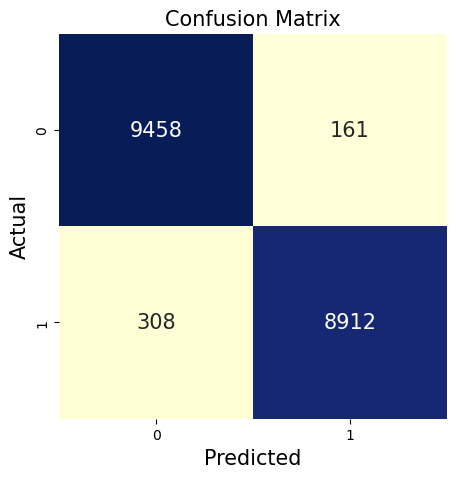

In [25]:
# grafico de matriz de confusao
import seaborn as sns
import matplotlib.pyplot as plt

# Avaliar a matriz de confusão 
cm = confusion_matrix(y_test, predictions)

# Plotar a matriz de confusão
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, annot_kws={"size": 15})
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Actual", fontsize=15)
plt.title("Confusion Matrix", fontsize=15)
plt.show()



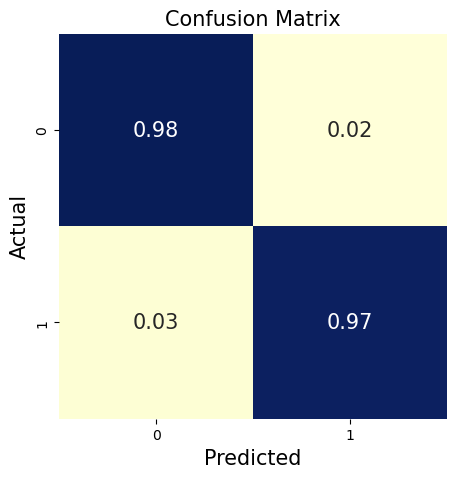

In [26]:
# Agora confusion matrix com porcentagem

cm = confusion_matrix(y_test, predictions)

# Normalizar a matriz de confusão
cm = cm / cm.sum(axis=1).reshape(-1, 1)

# Plotar a matriz de confusão
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False, annot_kws={"size": 15})
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Actual", fontsize=15)
plt.title("Confusion Matrix", fontsize=15)
plt.show()


## 4. Assess the dataset size

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from tqdm import tqdm

# vamos fazer um learning curve para avaliar o impacto do tamanho do dataset na acurácia do modelo, mas sem importar nada, na mão mesmo, e com barra de progresso

train_sizes = np.linspace(0.1, 0.99, 10)  # Ajuste para evitar 1.0

train_scores = []
test_scores = []

toggle = False # Alterar para True para treinar o modelo

if toggle:
    for train_size in tqdm(train_sizes, desc="Training Progress"):
        X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
        X_train_sample_vectorized = vectorizer.transform(X_train_sample)
        
        model = loaded_model
        model.fit(X_train_sample_vectorized, y_train_sample)
        
        train_predictions = model.predict(X_train_sample_vectorized)
        train_scores.append(balanced_accuracy_score(y_train_sample, train_predictions))
        
        test_predictions = model.predict(vectorizer.transform(X_test))
        test_scores.append(balanced_accuracy_score(y_test, test_predictions))

    # Exibir os resultados finais
    print("Train Scores:", train_scores)
    print("Test Scores:", test_scores)

    # Vamos salvar os resultados em um arquivo CSV
    learning_curve = pd.DataFrame({"train_size": train_sizes, "train_score": train_scores, "test_score": test_scores})
    learning_curve.to_csv("learning_curve.csv", index=False)

''' A trining score ficou muito constante, mas a test score aumentou:
Train Scores: [0.9991963086597742, 0.998787196972936, 0.9986455714657582, 0.9984738191106498, 0.9985119734618155, 0.9981025565893835, 0.99806688072665, 0.9979723318975688, 0.9978659066766815, 0.9977698251286116]
Test Scores: [0.9446658412185391, 0.9561180826811722, 0.961026255429477, 0.9643932527790375, 0.9672744301938567, 0.968693648845301, 0.969751253788879, 0.9721873443264291, 0.9737962465375491, 0.974553216146911]

Isso indica que o modelo está aprendendo bem e generalizando para novos dados, porém a acurácia de treino está muito alta, o que pode indicar overfitting.

'''



' A trining score ficou muito constante, mas a test score aumentou:\nTrain Scores: [0.9991963086597742, 0.998787196972936, 0.9986455714657582, 0.9984738191106498, 0.9985119734618155, 0.9981025565893835, 0.99806688072665, 0.9979723318975688, 0.9978659066766815, 0.9977698251286116]\nTest Scores: [0.9446658412185391, 0.9561180826811722, 0.961026255429477, 0.9643932527790375, 0.9672744301938567, 0.968693648845301, 0.969751253788879, 0.9721873443264291, 0.9737962465375491, 0.974553216146911]\n\nIsso indica que o modelo está aprendendo bem e generalizando para novos dados, porém a acurácia de treino está muito alta, o que pode indicar overfitting.\n\n'

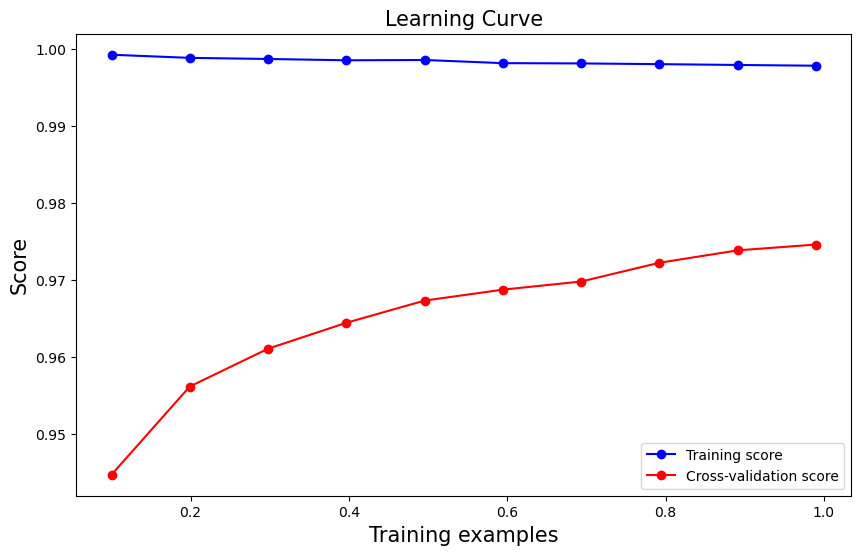

In [29]:
# vamos pegar o arquivo e plotar o learning curve do csv
df_learning_curve = pd.read_csv("learning_curve.csv")

train_sizes = df_learning_curve["train_size"]
train_scores = df_learning_curve["train_score"]
test_scores = df_learning_curve["test_score"]

# Plotar a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.title("Learning Curve", fontsize=15)
plt.legend(loc="best")
plt.show()

Training Score: O fato de a linha azul ser praticamente constante e muito próxima de 1.0 indica que o modelo está altamente ajustado aos dados de treino, ou seja, está memorizando os dados. Isso pode ser um sinal de overfitting, principalmente se o modelo não estiver generalizando bem.
Test Score: A linha vermelha subindo à medida que o tamanho do conjunto de treino aumenta indica que o modelo está melhorando sua capacidade de generalização, mas ainda há um gap entre o desempenho de treino e de teste. O modelo parece estar aprendendo melhor com mais dados de treino, o que é esperado. No entanto, o gap entre as duas linhas sugere que pode haver overfitting. Com mais dados, o modelo generaliza melhor, mas ainda não tanto quanto o desejado.


## 5. Use topic models to refine your answers
What does a topic analysis show? Do we have the same error rate over all dataset? Or are there some topics in which classification is more effective? Test a two-layer classifier in which documents are first classified according to their topic, and are then redirected to a classifier focused solely on that specific topic.

In [30]:
'''
Use topic models to refine your answers
What does a topic analysis show? Do we have the same error rate over all dataset? Or are there some topics in which classification is more effective? 
Test a two-layer classifier in which documents are first classified according to their topic, and are then redirected to a classifier focused solely on 
that specific topic.
'''

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np


lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_train_vectorized)

TOP 10 WORDS FOR TOPIC #0
['if', 'source', 'in', 'help', 'samba', 'to', 'http', 'org', 'the', 'escapenumber']


TOP 10 WORDS FOR TOPIC #1
['is', 'it', 'in', 'escapenumber', 'you', 'of', 'to', 'and', 'the', 'escapelong']


TOP 10 WORDS FOR TOPIC #2
['that', 'is', 'on', 'for', 'escapenumber', 'in', 'and', 'to', 'of', 'the']


TOP 10 WORDS FOR TOPIC #3
['as', 'cnn', 'for', 'de', 'you', 'your', 'to', 'http', 'escapenumber', 'com']


TOP 10 WORDS FOR TOPIC #4
['this', 'that', 'for', 'is', 'you', 'in', 'of', 'and', 'to', 'the']




In [32]:
for index, topic in enumerate(lda.components_):
    print(f"TOP 10 WORDS FOR TOPIC #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

TOP 10 WORDS FOR TOPIC #0
['if', 'source', 'in', 'help', 'samba', 'to', 'http', 'org', 'the', 'escapenumber']


TOP 10 WORDS FOR TOPIC #1
['is', 'it', 'in', 'escapenumber', 'you', 'of', 'to', 'and', 'the', 'escapelong']


TOP 10 WORDS FOR TOPIC #2
['that', 'is', 'on', 'for', 'escapenumber', 'in', 'and', 'to', 'of', 'the']


TOP 10 WORDS FOR TOPIC #3
['as', 'cnn', 'for', 'de', 'you', 'your', 'to', 'http', 'escapenumber', 'com']


TOP 10 WORDS FOR TOPIC #4
['this', 'that', 'for', 'is', 'you', 'in', 'of', 'and', 'to', 'the']


